<a href="https://colab.research.google.com/github/GuillaumeMagnette/Stage_Tritons/blob/master/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import urllib

#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#!git clone https://github.com/GuillaumeMagnette/Stage_Tritons.git


try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tensorflow.keras import backend
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras import Sequential
mpl.rcParams['figure.figsize'] = (12, 5)

AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import os
import pathlib
import shutil
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
!rm -rf /content/content
drive.mount('/content/drive')
#!cp '/content/drive/My Drive/slim.zip' slim.zip
!unzip -q /content/drive/"My Drive"/Stage/Stage_Dataset.zip

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

In [0]:
img = cv2.imread('/content/content/Stage/database/Bascha_P01_T01_K04_F_Adult_4173_20190330031615.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = np.zeros(img.shape[:2],np.uint8)
img0 = cv2.equalizeHist(img[:,:,0])
img1 = cv2.equalizeHist(img[:,:,1])
img2 = cv2.equalizeHist(img[:,:,2])
img[:,:,0] = img0
img[:,:,1] = img1
img[:,:,2] = img2

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (10,0,80,310)

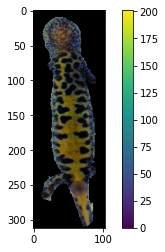

In [5]:
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]


plt.imshow(img)
plt.colorbar()
plt.show()

In [0]:
img = cv2.imread('/content/content/Stage/database/Bascha_P01_T01_K03_M_Adult_4414_20190321010103.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (1,0,52,200)

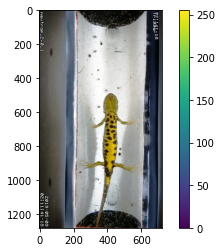

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
img = cv2.imread('/content/content/Stage/database/Bascha_P01_T01_K04_F_Adult_4240_20190330204648.jpg')
#img = cv2.imread('/content/content/Stage/database/Bascha_P01_T02_K05_F_Adult_4706_20190317135353.jpg')
img = cv2.imread('/content/content/Stage/database/Bascha_P01_T01_K10_M_20190509021141-18.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img0 = cv2.equalizeHist(img[:,:,0])
img1 = cv2.equalizeHist(img[:,:,1])
img2 = cv2.equalizeHist(img[:,:,2])
img[:,:,0] = img0
img[:,:,1] = img1
img[:,:,2] = img2

plt.imshow(img)
plt.colorbar()
plt.show()

taille = 50
mask = np.zeros(img.shape[:2],np.uint8)
#mask[int(mask.shape[0]/2)-taille:int(mask.shape[0]/2)+taille,int(mask.shape[1]/2)-taille:int(mask.shape[1]/2)+taille] = 1
print(mask)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (300,400,300,600)

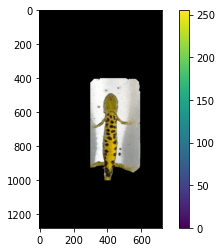

In [41]:
mask, bgdModel, fgdModel = cv2.grabCut(img,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

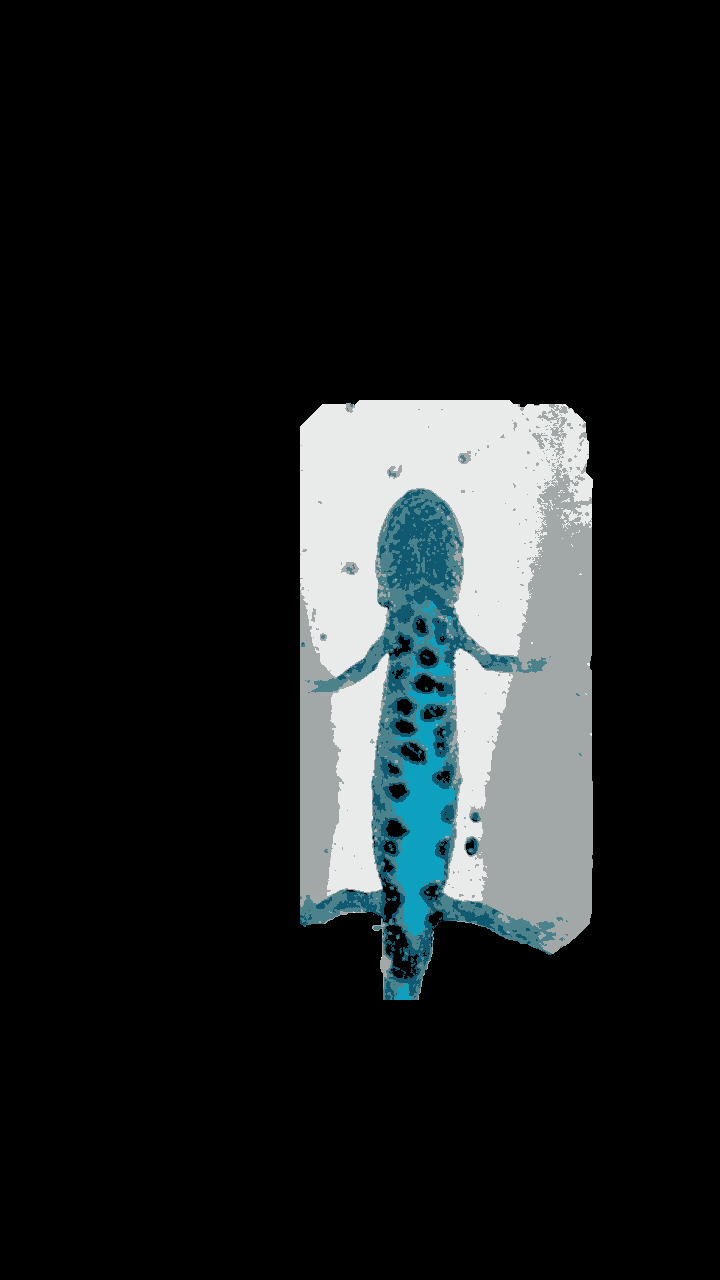

In [42]:
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 6
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2_imshow(res2)

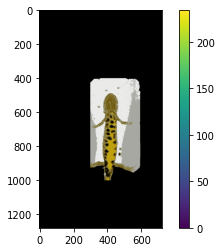

In [43]:
cv2.grabCut(res2,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
res2 = res2*mask2[:,:,np.newaxis]

plt.imshow(res2)
plt.colorbar()
plt.show()

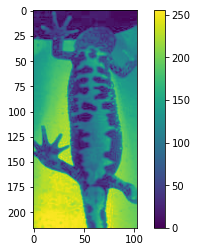

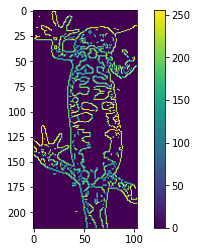

In [66]:
src_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(src_gray)
plt.colorbar()
plt.show()
#canny_output = cv2.Canny(src_gray,250, 250 * 2)
canny_output = auto_canny(src_gray, sigma = 0.1)
plt.imshow(canny_output)
plt.colorbar()
plt.show()
    
contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
# Get the moments
mu = [None]*len(contours)
for i in range(len(contours)):
   mu[i] = cv2.moments(contours[i])

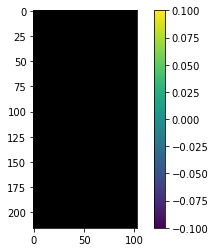

In [63]:
canny_output = cv2.cvtColor(canny_output, cv2.COLOR_RGBA2RGB)
cv2.grabCut(canny_output,mask,rect,bgdModel,fgdModel,2,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
canny_output = canny_output*mask2[:,:,np.newaxis]

plt.imshow(res2)
plt.colorbar()
plt.show()

In [43]:
print(len(mu))
contours

106


[array([[[ 56, 211]],
 
        [[ 57, 212]],
 
        [[ 57, 213]],
 
        [[ 57, 212]]], dtype=int32), array([[[ 54, 203]],
 
        [[ 56, 203]],
 
        [[ 58, 205]],
 
        [[ 58, 207]],
 
        [[ 60, 209]],
 
        [[ 60, 210]],
 
        [[ 61, 211]],
 
        [[ 61, 212]],
 
        [[ 62, 213]],
 
        [[ 62, 215]],
 
        [[ 62, 213]],
 
        [[ 61, 212]],
 
        [[ 61, 210]],
 
        [[ 60, 209]],
 
        [[ 60, 208]],
 
        [[ 58, 206]],
 
        [[ 58, 205]],
 
        [[ 57, 204]],
 
        [[ 57, 203]]], dtype=int32), array([[[ 69, 195]],
 
        [[ 66, 198]],
 
        [[ 66, 205]],
 
        [[ 67, 206]],
 
        [[ 67, 208]],
 
        [[ 68, 209]],
 
        [[ 68, 213]],
 
        [[ 69, 214]],
 
        [[ 69, 215]],
 
        [[ 69, 213]],
 
        [[ 68, 212]],
 
        [[ 68, 208]],
 
        [[ 67, 207]],
 
        [[ 67, 206]],
 
        [[ 66, 205]],
 
        [[ 66, 199]],
 
        [[ 68, 197]],
 
        [[ 68, 1